# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_count = 0
set_count = 1

print('Beginning Data Retrieval ')
print('-----------------------------')

base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
retrieval_url = f'{base_url}appid={weather_api_key}&units={units}&q='


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(retrieval_url + city).json()
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        if index_count > 49:
            index_count = 0
            set_count = set_count + 1
    
        else:
            index_count = index_count + 1
            
        print(f'Processing Record {index_count} of Set {set_count} : {city}') 
  
    except(KeyError, IndexError):
        print('City not found. Skipping...')

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : belaya gora
Processing Record 2 of Set 1 : cherskiy
Processing Record 3 of Set 1 : busselton
Processing Record 4 of Set 1 : albany
Processing Record 5 of Set 1 : nikolskoye
Processing Record 6 of Set 1 : new norfolk
Processing Record 7 of Set 1 : kapaa
Processing Record 8 of Set 1 : naze
Processing Record 9 of Set 1 : cape town
Processing Record 10 of Set 1 : gunjur
Processing Record 11 of Set 1 : ribeira grande
Processing Record 12 of Set 1 : mar del plata
Processing Record 13 of Set 1 : ushuaia
Processing Record 14 of Set 1 : souillac
Processing Record 15 of Set 1 : bredasdorp
Processing Record 16 of Set 1 : barrow
City not found. Skipping...
Processing Record 17 of Set 1 : hobart
Processing Record 18 of Set 1 : honningsvag
City not found. Skipping...
Processing Record 19 of Set 1 : longyearbyen
Processing Record 20 of Set 1 : mataura
Processing Record 21 of Set 1 : kota kinabalu
Processing Record 

Processing Record 35 of Set 4 : beringovskiy
City not found. Skipping...
Processing Record 36 of Set 4 : virginia beach
Processing Record 37 of Set 4 : banda aceh
City not found. Skipping...
Processing Record 38 of Set 4 : salalah
Processing Record 39 of Set 4 : husavik
Processing Record 40 of Set 4 : zhuzhou
Processing Record 41 of Set 4 : omboue
Processing Record 42 of Set 4 : georgetown
Processing Record 43 of Set 4 : tutoia
Processing Record 44 of Set 4 : ust-tsilma
Processing Record 45 of Set 4 : labytnangi
Processing Record 46 of Set 4 : touros
Processing Record 47 of Set 4 : tezu
City not found. Skipping...
City not found. Skipping...
Processing Record 48 of Set 4 : washington
Processing Record 49 of Set 4 : teya
Processing Record 50 of Set 4 : hoquiam
Processing Record 0 of Set 5 : yenagoa
Processing Record 1 of Set 5 : weleri
City not found. Skipping...
Processing Record 2 of Set 5 : constitucion
Processing Record 3 of Set 5 : lima
Processing Record 4 of Set 5 : ponta delgada


Processing Record 18 of Set 8 : tiznit
Processing Record 19 of Set 8 : buala
Processing Record 20 of Set 8 : praia da vitoria
Processing Record 21 of Set 8 : richards bay
City not found. Skipping...
Processing Record 22 of Set 8 : bundaberg
Processing Record 23 of Set 8 : haines junction
Processing Record 24 of Set 8 : sheridan
Processing Record 25 of Set 8 : otane
Processing Record 26 of Set 8 : puerto leguizamo
Processing Record 27 of Set 8 : vaitape
Processing Record 28 of Set 8 : cabedelo
Processing Record 29 of Set 8 : angol
Processing Record 30 of Set 8 : jardim
Processing Record 31 of Set 8 : mitsamiouli
Processing Record 32 of Set 8 : mandurah
Processing Record 33 of Set 8 : la palma
Processing Record 34 of Set 8 : nueve de julio
Processing Record 35 of Set 8 : sirjan
Processing Record 36 of Set 8 : kikwit
Processing Record 37 of Set 8 : avenal
Processing Record 38 of Set 8 : muisne
Processing Record 39 of Set 8 : teguldet
Processing Record 40 of Set 8 : wasilla
City not found.

Processing Record 2 of Set 12 : kysyl-syr
Processing Record 3 of Set 12 : santa maria del oro
Processing Record 4 of Set 12 : fairbanks
Processing Record 5 of Set 12 : cap-chat
Processing Record 6 of Set 12 : vanimo
Processing Record 7 of Set 12 : great falls
Processing Record 8 of Set 12 : kualakapuas
Processing Record 9 of Set 12 : komsomolskiy
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#build dataframe
weather_df = pd.DataFrame({
    'City' : city_name,
    'Lat' : lat,
    'Lng' : lng,
    'Max Temp' : max_temp,
    'Humidity': humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed' : wind_speed,
    'Country' : country,
    'Date': date,
    
})

#export to csv
weather_df.to_csv('output_data/cities.csv', index = False)

#display dataframe
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Belaya Gora,68.5333,146.4167,-21.30,87,100,3.69,RU,1611868891
1,Cherskiy,68.7500,161.3000,-28.77,85,82,2.71,RU,1611868567
2,Busselton,-33.6500,115.3333,61.00,80,0,12.39,AU,1611868568
3,Albany,42.6001,-73.9662,21.00,49,29,3.00,US,1611868891
4,Nikolskoye,59.7035,30.7861,32.00,93,75,8.95,RU,1611868891
...,...,...,...,...,...,...,...,...,...
565,Cap-Chat,49.1001,-66.6821,21.20,73,91,2.30,CA,1611868824
566,Vanimo,-2.6741,141.3028,78.04,82,98,3.36,PG,1611868993
567,Great Falls,47.5002,-111.3008,48.20,31,1,14.97,US,1611868877
568,Kualakapuas,-3.0091,114.3876,73.40,100,75,2.04,ID,1611868993


In [14]:
#summary stats for dataframe
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,20.324191,18.300985,48.890649,71.817544,51.642105,8.979632,1.611869e+09
std,32.956104,90.015432,33.842725,19.296458,40.044593,6.549129,1.053974e+02
min,-54.800000,-175.200000,-53.950000,12.000000,0.000000,0.160000,1.611868e+09
25%,-5.325375,-60.208275,30.050000,62.000000,4.000000,4.060000,1.611869e+09
50%,25.393350,22.319100,59.000000,76.000000,56.000000,7.260000,1.611869e+09
75%,47.478200,96.144625,77.000000,87.000000,90.000000,11.617500,1.611869e+09
max,78.218600,179.316700,95.400000,100.000000,100.000000,37.980000,1.611869e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
#n/a no data with >100% humidity see above 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

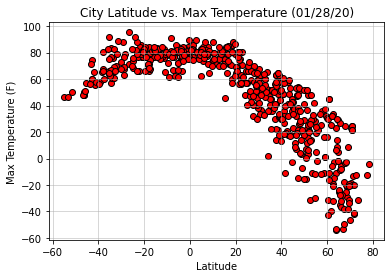

In [21]:
#create scater plot
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], facecolor = 'red', edgecolor = 'black')

#title
plt.title('City Latitude vs. Max Temperature (01/28/20)')

#x axis label
plt.xlabel('Latitude')

#y axis label
plt.ylabel('Max Temperature (F)')

#set gid
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#export as png
plt.savefig('output_data/city__latitude_vs_max_temperature.png')

## Latitude vs. Humidity Plot

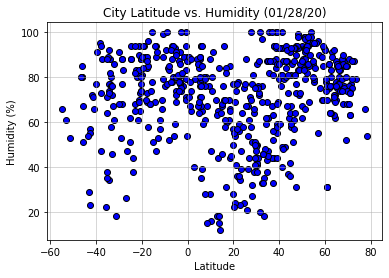

In [22]:
#create scater plot
plt.scatter(weather_df['Lat'], weather_df['Humidity'], facecolor = 'blue', edgecolor = 'black')

#title
plt.title('City Latitude vs. Humidity (01/28/20)')

#x axis label
plt.xlabel('Latitude')

#y axis label
plt.ylabel('Humidity (%)')

#set gid
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#export as png
plt.savefig('output_data/city_latitude_vs_humidity.png')

## Latitude vs. Cloudiness Plot

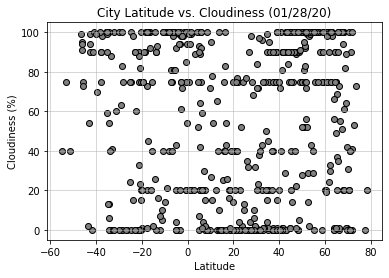

In [23]:
#create scater plot
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], facecolor = 'gray', edgecolor = 'black')

#title
plt.title('City Latitude vs. Cloudiness (01/28/20)')

#x axis label
plt.xlabel('Latitude')

#y axis label
plt.ylabel('Cloudiness (%)')

#set gid
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#export as png
plt.savefig('output_data/city_latitude_vs_Cloudiness.png')

## Latitude vs. Wind Speed Plot

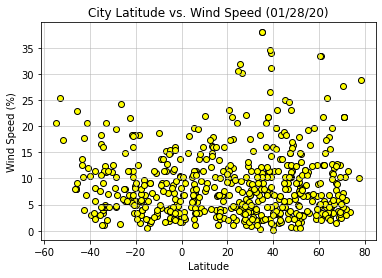

In [24]:
#create scater plot
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], facecolor = 'yellow', edgecolor = 'black')

#title
plt.title('City Latitude vs. Wind Speed (01/28/20)')

#x axis label
plt.xlabel('Latitude')

#y axis label
plt.ylabel('Wind Speed (%)')

#set gid
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#export as png
plt.savefig('output_data/city_latitude_vs_Wind Speed.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


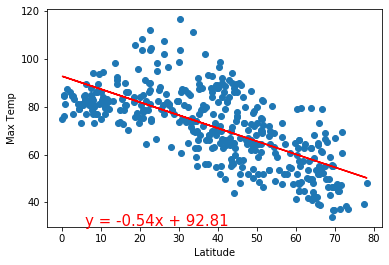

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


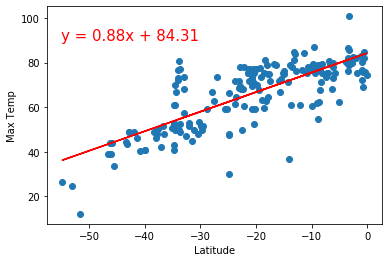

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


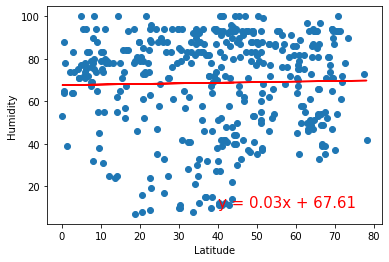

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


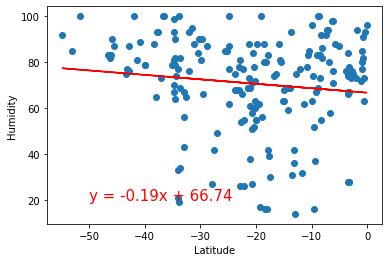

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


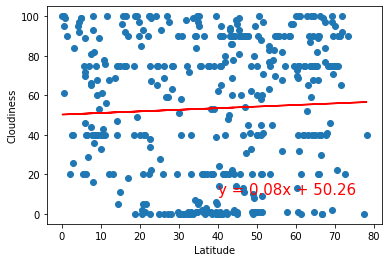

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


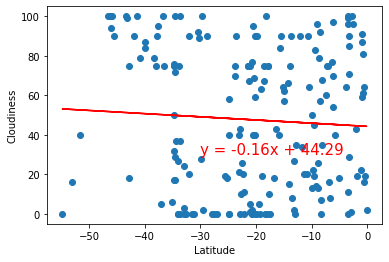

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


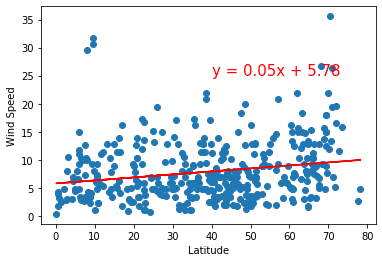

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


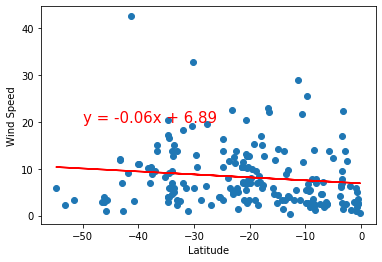